In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# First, read in the data
df1 = pd.read_csv('winemag_data_pandata.csv',index_col=0)
df1.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Exploratory Data Analysis

Let's take a look into the two numeric columns within our dataset

In [9]:
#Create variable for price column and explore what is in the data
price = df1['price']
price.value_counts().sort_index()

-24.0       327
-23.0       153
-22.0       351
-21.0       116
-20.0       645
-19.0       281
-18.0       506
-17.0       305
-16.0       369
-15.0       625
-14.0       346
-13.0       331
-12.0       399
-11.0       195
-10.0       329
-9.0        122
-8.0         81
-7.0         45
-6.0         13
-5.0          5
-4.0          3
 4.0          8
 5.0         41
 6.0        107
 7.0        388
 8.0        811
 9.0       1217
 10.0      3110
 11.0      1863
 12.0      3535
           ... 
 698.0        1
 710.0        1
 750.0        1
 757.0        1
 764.0        1
 767.0        1
 770.0        2
 775.0        4
 780.0        1
 790.0        1
 800.0        5
 820.0        1
 848.0        1
 850.0        3
 886.0        1
 900.0        1
 932.0        1
 973.0        1
 980.0        1
 1000.0       2
 1100.0       2
 1125.0       1
 1200.0       1
 1300.0       1
 1500.0       2
 1900.0       1
 2000.0       2
 2013.0       1
 2500.0       2
 3300.0       1
Name: price, Length: 411

Looking at the price data, which is sorted from lowest value to highest, we can see that some of the values are negative. Since the lowest "positive" value is 4.0, and the negative value that is closest to 0 is -4.0, we can make an assumption that when the price is negative, it was accidentally entered as a negative number instead of a positive number. To fix this, we just need to take the absolute value of this column. We also see that most of the wines are rather cheap in comparison to the "high end" wines with respect to price. This could create some skew in the distribution. Let's keep this in mind moving forward.

In [20]:
#Turn price data into absolute values, look at descriptive stats
df1['price'] = abs(df1['price'])
price = df1['price']
price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

This looks much better, now to look at the histogram

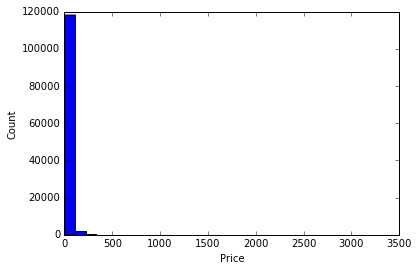

In [26]:
plt.hist(price.dropna().values,bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Glancing at the histogram, we can see that a huge amount of wines are priced low, but there are some wines priced significantly higher. Let's try doing a log transformation to see if we can get something closer to a normal distribution.

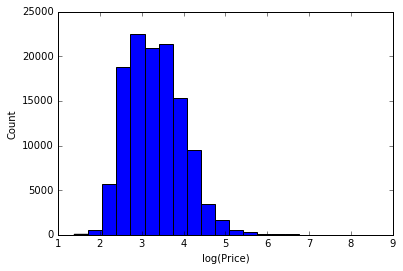

In [28]:
#Take hist of log(price)
plt.hist(np.log(price).dropna().values,bins=20)
plt.xlabel('log(Price)')
plt.ylabel('Count')
plt.show()

On the surface, it seems as though taking the log is useful in this case. Let's keep this in mind going forward with our analysis.

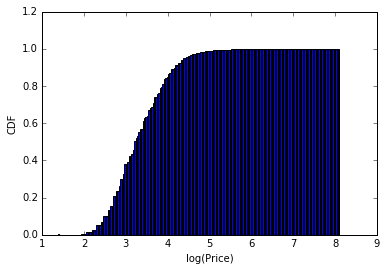

In [31]:
#Create CDF for log(price)
plt.hist(np.log(price).dropna().values,normed=True,cumulative=True,bins=200)
plt.xlabel('log(Price)')
plt.ylabel('CDF')
plt.show()

As we can see from viewing the CDF above, once $log(price)$ gets up to around 4.5, the CDF levels off, as most of the data are less than 4.5.

80       397
81       692
82      1836
83      3025
84      6480
85      9530
86     12600
87     16933
88     17207
89     12226
90     15410
91     11359
92      9613
93      6489
94      3758
95      1535
96       523
97       229
98        77
99        33
100       19
Name: points, dtype: int64


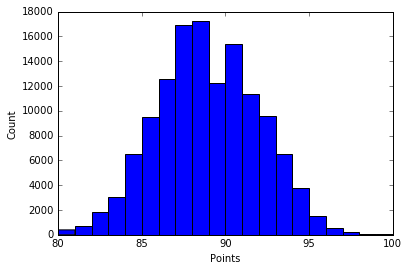

In [35]:
#Create variable for points column and explore what is in the data
points = df1['points']
print(points.value_counts().sort_index())
plt.hist(points.dropna().values,bins=20)
plt.xlabel('Points')
plt.ylabel('Count')
plt.show()

Looking at the histogram of the points data, it doesn't seem as though any tinkering is needed.

# Price vs Points by Country (Country >= 1000 reviews)

First, let's create a dataframe for countries that have over 1000 reviews, and look at the bar chart for number of reviews per country.

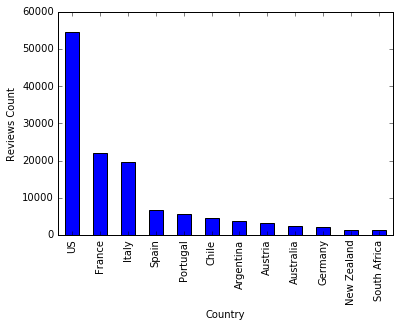

In [39]:
ratingCounts = df1['country'].value_counts()
greater1000 = ratingCounts[ratingCounts >= 1000] #Create dataFrame that has countries w/at least 1000 reviews
greater1000.plot.bar()
plt.xlabel('Country')
plt.ylabel('Reviews Count')
plt.show()

In [41]:
# How many countries
print(len(greater1000.index))

12


In [42]:
#Create DF of only countries w/at least 1000 reviews, greater1000Df
greater1000Df = df1[df1['country'].isin(greater1000.index)]
greater1000Df = greater1000Df.dropna(subset=['price','points'])

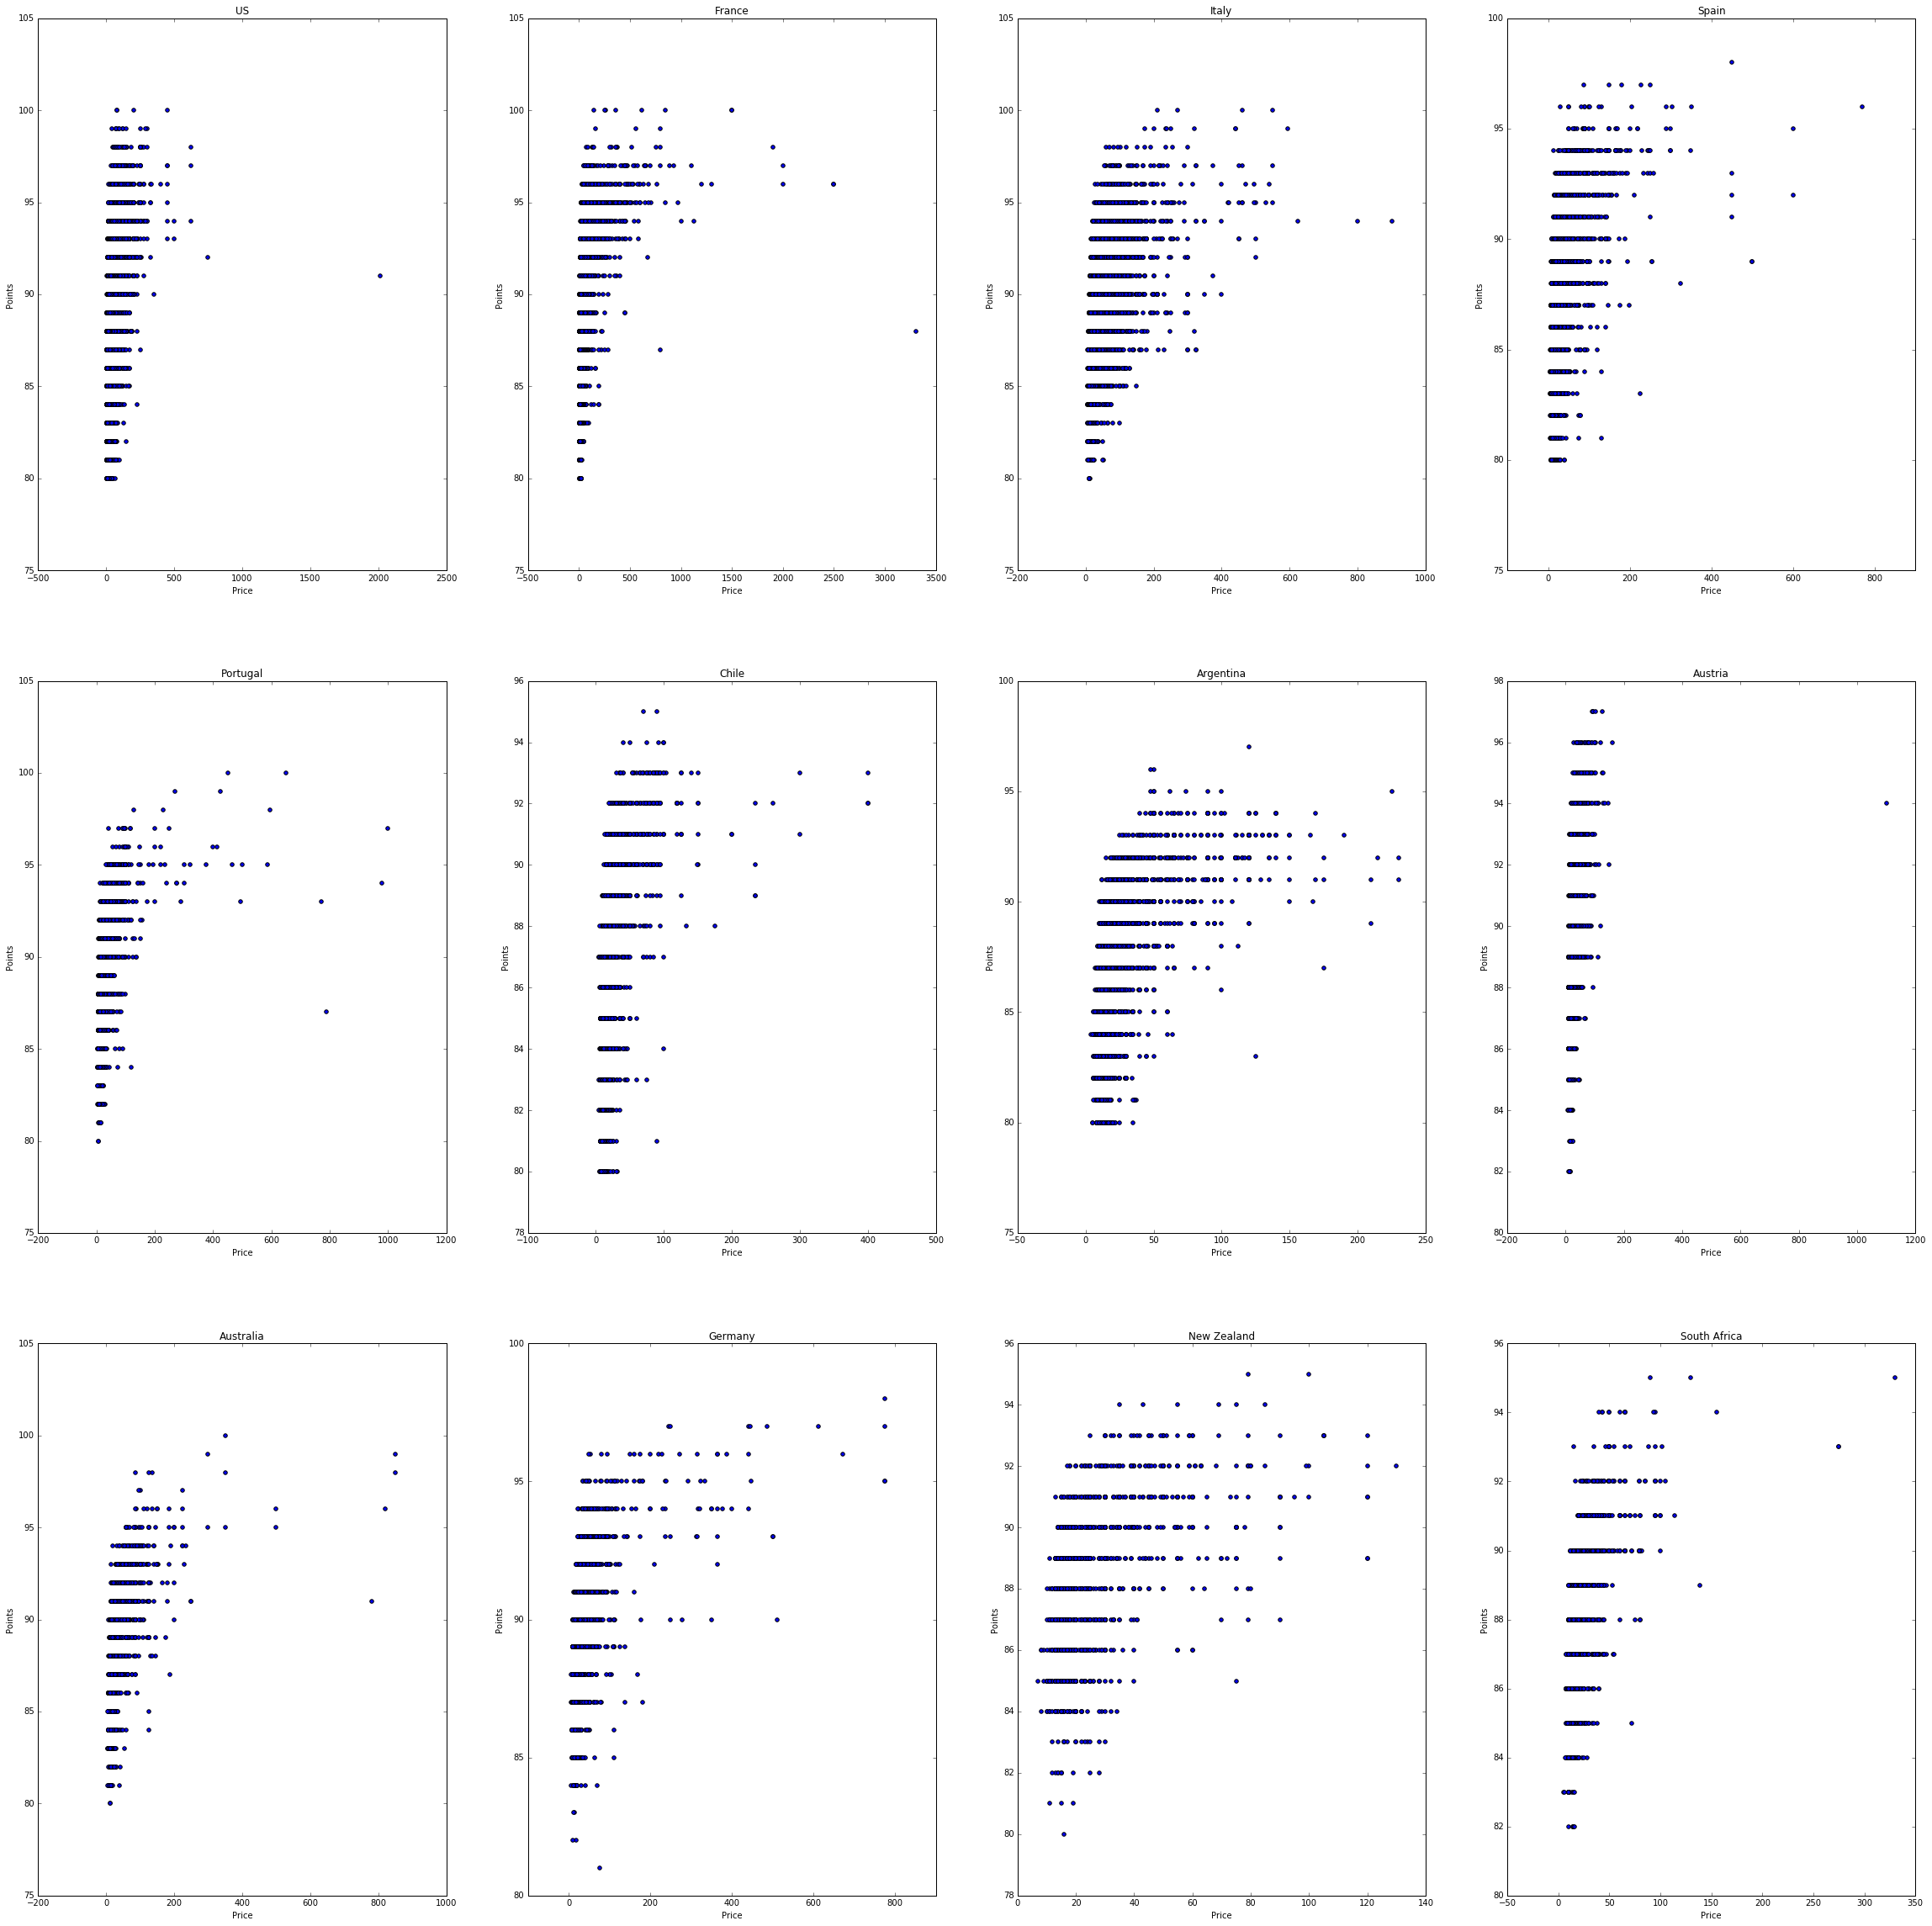

In [46]:
#Since we have 12 countries, create a grid for our plots that is 3x4
fig, ax = plt.subplots(4,3,figsize=(40,40))

for i in range(len(greater1000.index)):
    #For every country within greater1000Df, make a DF based on that country and add plot to grid
    countryDf = greater1000Df[greater1000Df['country'] == greater1000.index[i]]
    plt.subplot(3,4,i+1)
    plt.scatter(countryDf['price'],countryDf['points'])
    plt.title(greater1000.index[i])
    plt.xlabel('Price')
    plt.ylabel('Points')
    
plt.show()

# Models

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [66]:
#Get rid of NaN values in our main dataframe
df1 = df1.dropna(subset=['price','points'])
points = df1['points']
price = df1['price']

In [67]:
#Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(price.dropna().values, points.dropna().values, test_size=0.25)

In [68]:
#Create regressor and fit training data to test data
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
#Evaluate model using MSE
y_pred = regressor.predict(X_test.reshape(-1,1))
print(mean_squared_error(y_test, y_pred))

7.60915799243


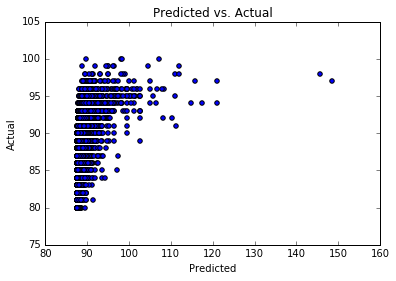

In [72]:
#Plot predictions vs actual
plt.scatter(y_pred, y_test)
plt.title("Predicted vs. Actual")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.show()

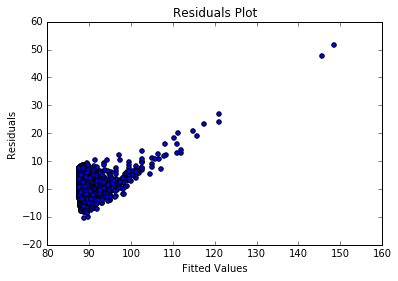

In [73]:
#Residuals plot
residuals = y_pred - y_test
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

We can see a clear pattern in our residuals plot. As our fitted values increase, so do our residuals. This violates our model assumption of nearly normal residuals, and tells us that this model shouldn't be used. This is confirmed by our histogram of residuals for this model below.

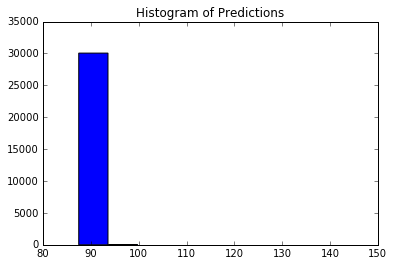

In [75]:
plt.hist(y_pred)
plt.title("Histogram of Predictions")
plt.show()

Now let's try using $log(price)$ to predict points

In [86]:
#Take log(price)
logPrice = np.log(df1['price'])

In [87]:
#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(logPrice.dropna().values, points.dropna().values, test_size=0.25)

In [88]:
#Create regressor and fit new data
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
#Evaluate model using MSE
y_pred = regressor.predict(X_test.reshape(-1,1))
print(mean_squared_error(y_test, y_pred))

5.85397480662


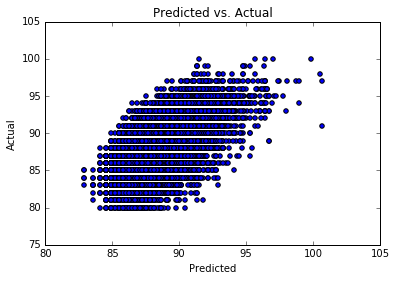

In [90]:
#Plot predictions vs actual
plt.scatter(y_pred, y_test)
plt.title("Predicted vs. Actual")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.show()

We can see a clear, positive correlation between the predicted and actual values in the plot above. We can feel confident about future predictions using this model.

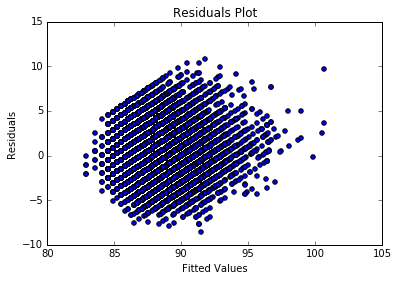

In [91]:
#Residuals plot
residuals = y_pred - y_test
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

This residuals plot looks much better. There is no clear pattern, and the variance among the residuals seems to be reasonably even across the plot.

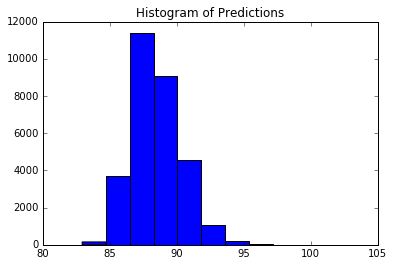

In [92]:
plt.hist(y_pred)
plt.title("Histogram of Predictions")
plt.show()

The histogram among the residuals seems reasonably normal, so our modeling assumptions are satisfied. We can feel confident deploying this model in the future to predict points. Among these two models, we definitely want to choose the model that uses $log(price)$, since all modeling assumptions are satisfied, and the MSE for the model is much lower.